# Airline Flight Delays Case Study

#### MSDS 7333 - Quantifying the World - 04/20/17
#### Author: James Tsai, Wid Sogata     
=================================================================================




## Abstract
Since October 1987, there have been over 50 million flights in the United States that failed to depart at their scheduled times. Around 200,000 of those flights were at least two hours late and some were much later. From these two simple facts we can surmise that delays are not isolated, rare events, they are routine. Since 1987 the number of flights per year has steadily increased and as this trend continues we expect to see more inconvenience, more aggravation, and more time lost.   

In this case study, we are going to analyze airline data set.  We intend to have a better understanding of the cause of flight delays which could allow the airline industry to intelligently react to issues and providing more flights with fewer delays. At the same time, we are going to explore and utilize available packages in R and Python that are available to handle big data analysis.


#### Keywords
Big Data, Parallel Processing, Memory, Storage, Graphlab 

## Introduction
In 2009, the American Statistical Association (ASA) Section on Statistical Computing and Statistical Graphics released the “Airline on-time performance” data set for their biannual data exposition. The data set was compiled and organized by Hadley Wickham from the
official releases from the US government’s Bureau of Transportation Research and Innovative Technology Administration (RITA) Web site (http://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236). The data include commercial flight information from October 1987 to April 2008 for those carriers with at least 1% of domestic U.S. flights in a given year. In total, there is information for over 120 million flights, each with 29 variables related to flight time, delay time, departure airport, arrival airport, and so on. In total, the uncompressed data set is about 12 gigabytes (GB) in size.    
Table 1 shows the list of the variables and short description. 


|    |   Variable Name   |                                 Description                                |
|----|:-----------------:|:--------------------------------------------------------------------------:|
| 1  |        Year       |                                  1987-2008                                 |
| 2  |       Month       |                                    1-12                                    |
| 3  |     DayofMonth    |                                    1-31                                    |
| 4  |     DayOfWeek     |                           1 (Monday) - 7 (Sunday)                          |
| 5  |      DepTime      |                     Actual Departure Time (local, hhmm)                    |
| 6  |     CRSDepTime    |                   Scheduled Departure Time (local, hhmm)                   |
| 7  |      ArrTime      |                      Actual Arrival Time (local, hhmm)                     |
| 8  |     CRSArrTime    |                    Scheduled Arrival Time (local, hhmm)                    |
| 9  |   UniqueCarrier   |                             Unique Carrier Code                            |
| 10 |     FlightNum     |                                Flight Number                               |
| 11 |      TailNum      |                              Plane Tail Number                             |
| 12 | ActualElapsedTime |                       Actual Elapsed Time, in Minutes                      |
| 13 |   CRSElapsedTime  |                      Scheduled ElapsedTime, in Minutes                     |
| 14 |      AirTime,     |                            Air Time, in Minutes                            |
| 15 |      ArrDelay     |                          Arrival Delay, in Minutes                         |
| 16 |      DepDelay     |                         Departure Delay, in Minutes                        |
| 17 |       Origin      |                          Origin IATA Airport Code                          |
| 18 |        Dest       |                        Destination IATA Airport Code                       |
| 19 |      Distance     |                             Distance, in Miles                             |
| 20 |       TaxiIn      |                          Taxi In Time, in Minutes                          |
| 21 |      TaxiOut      |                          Taxi Out Time, in Minutes                         |
| 22 |     Cancelled     |                          Was the Flight Cancelled?                         |
| 23 |  CancellationCode | Reason for Cancellation  (A = Carrier, B = Weather, C = NAS, D = Security) |
| 24 |      Diverted     |                         Diverted? (1 = Yes, 0 = No)                        |
| 25 |    CarrierDelay   |                          Carrier Delay, in Minutes                         |
| 26 |    WeatherDelay   |                          Weather Delay, in Minutes                         |
| 27 |      NASDelay     |                            NAS Delay, in Minutes                           |
| 28 |   SecurityDelay   |                         Security Delay, in Minutes                         |
| 29 | LateAircraftDelay |                       Late Aircraft Delay, in Minutes                      |

<center> Table 1. Variables and Descriptions. </center>
<br>

The data set is large that it is difficult to analyze using the standard tools and techniques we have come to rely upon. As a result, the different approach need to be utilized to understand the structure of these data. This case study presents some of these approaches and technologies along with an initial exploration of airline flight delays. 

In this case study, we intend to do the following:
* Work with the airline data set (use R or Python to manage out-of-core)
    + Collect data 
    + Prepare and clean data
* Answer the following questions by using the split-apply-combine technique:  
    + Which Airports are the busiest?
    + Which Airplane is newest?
    + Which airports are most likely to be delayed flying out of or into?      
    + Which flights with same origin and destination are most likely to be delayed?
    + Can you regress how delayed a flight will be before it is delayed?
        * What are the most important features for this regression?
        * To use meaningful evaluation criteria.
        * Create at least one new feature variable for the regression.   

We are using Python version 2.7, R version 3.3.1 and Turi Graphlab Create version 1.8.3 running on Jupyter Notebook to perform this analysis.
<br>

## Method

### Downloading and Preparing Dataset

We manually download each of the zipped files and run the following script to download the files into a folder in the same directory as this notebook called "data".
In the following blocks of code, we download the data and then decompress the files into .csv files. Each csv contains data for one year of airline flights.   

In [134]:
import os, sys

# create a Data directory if not done already
path= "data"
if not os.path.exists(path):
    os.mkdir(path, 0755)

In [2]:
import urllib

years = range(1987,2009)  # get the years 1987 through 2008
baseurl = "http://stat-computing.org/dataexpo/2009/%d.csv.bz2"

files = []
for year in years:
    # prepare strings
    url = baseurl%(year) # get the URL for the data file
    save_as_filename = 'data/%d.csv.bz2'%(year)
    files += [save_as_filename] # save name of the compressed file
    
    # save name of the compressed file
    print ('Downloading to %s to %s')%(url, save_as_filename)
    urllib.urlretrieve(url, save_as_filename)

print ("\n\n")

!ls -l data




total 3239736
-rw-r--r--  1 wsogata  staff   12652442 Apr 17 08:32 1987.csv.bz2
-rw-r--r--  1 wsogata  staff   49499025 Apr 17 08:32 1988.csv.bz2
-rw-r--r--  1 wsogata  staff   49202298 Apr 17 08:32 1989.csv.bz2
-rw-r--r--  1 wsogata  staff   52041322 Apr 17 08:32 1990.csv.bz2
-rw-r--r--  1 wsogata  staff   49877448 Apr 17 08:33 1991.csv.bz2
-rw-r--r--  1 wsogata  staff   50040946 Apr 17 08:33 1992.csv.bz2
-rw-r--r--  1 wsogata  staff   50111774 Apr 17 08:33 1993.csv.bz2
-rw-r--r--  1 wsogata  staff   51123887 Apr 17 08:33 1994.csv.bz2
-rw-r--r--  1 wsogata  staff   74881752 Apr 17 08:33 1995.csv.bz2
-rw-r--r--  1 wsogata  staff   75887707 Apr 17 08:34 1996.csv.bz2
-rw-r--r--  1 wsogata  staff   76705687 Apr 17 08:34 1997.csv.bz2
-rw-r--r--  1 wsogata  staff   76683506 Apr 17 08:34 1998.csv.bz2
-rw-r--r--  1 wsogata  staff   79449438 Apr 17 08:34 1999.csv.bz2
-rw-r--r--  1 wsogata  staff   82537924 Apr 17 08:35 2000.csv.bz2
-rw-r--r--  1 wsogata  staff   83478700 Apr 17 08:35 2001.c

We have downloaded all files needed for this analysis. We continue to prepare the data by decompressing all files in the following step.

In [3]:
import bz2

# decompress all the files
for filename in files:
    filepath = filename
    newfilepath = filename[:-4]
    print 'Decompressing', filepath, 'to', newfilepath
    
    # go through the decompressed chunks and write out to a decompressed file
    with open(newfilepath ,'wb') as new_file, bz2.BZ2File(filepath, 'rb') as file:
        for data in iter(lambda : file.read(100*1024), b''):
            new_file.write(data)

Decompressing data/1987.csv.bz2 to data/1987.csv
Decompressing data/1988.csv.bz2 to data/1988.csv
Decompressing data/1989.csv.bz2 to data/1989.csv
Decompressing data/1990.csv.bz2 to data/1990.csv
Decompressing data/1991.csv.bz2 to data/1991.csv
Decompressing data/1992.csv.bz2 to data/1992.csv
Decompressing data/1993.csv.bz2 to data/1993.csv
Decompressing data/1994.csv.bz2 to data/1994.csv
Decompressing data/1995.csv.bz2 to data/1995.csv
Decompressing data/1996.csv.bz2 to data/1996.csv
Decompressing data/1997.csv.bz2 to data/1997.csv
Decompressing data/1998.csv.bz2 to data/1998.csv
Decompressing data/1999.csv.bz2 to data/1999.csv
Decompressing data/2000.csv.bz2 to data/2000.csv
Decompressing data/2001.csv.bz2 to data/2001.csv
Decompressing data/2002.csv.bz2 to data/2002.csv
Decompressing data/2003.csv.bz2 to data/2003.csv
Decompressing data/2004.csv.bz2 to data/2004.csv
Decompressing data/2005.csv.bz2 to data/2005.csv
Decompressing data/2006.csv.bz2 to data/2006.csv
Decompressing data/2

We remove the compressed bz2 files from your system.

In [4]:
!rm data/*.bz2
!ls -l data/

total 23494656
-rw-r--r--  1 wsogata  staff  127162942 Apr 17 08:37 1987.csv
-rw-r--r--  1 wsogata  staff  501039472 Apr 17 08:38 1988.csv
-rw-r--r--  1 wsogata  staff  486518821 Apr 17 08:39 1989.csv
-rw-r--r--  1 wsogata  staff  509194687 Apr 17 08:39 1990.csv
-rw-r--r--  1 wsogata  staff  491210093 Apr 17 08:40 1991.csv
-rw-r--r--  1 wsogata  staff  492313731 Apr 17 08:40 1992.csv
-rw-r--r--  1 wsogata  staff  490753652 Apr 17 08:41 1993.csv
-rw-r--r--  1 wsogata  staff  501558665 Apr 17 08:41 1994.csv
-rw-r--r--  1 wsogata  staff  530751568 Apr 17 08:42 1995.csv
-rw-r--r--  1 wsogata  staff  533922363 Apr 17 08:43 1996.csv
-rw-r--r--  1 wsogata  staff  540347861 Apr 17 08:43 1997.csv
-rw-r--r--  1 wsogata  staff  538432875 Apr 17 08:44 1998.csv
-rw-r--r--  1 wsogata  staff  552926022 Apr 17 08:44 1999.csv
-rw-r--r--  1 wsogata  staff  570151613 Apr 17 08:45 2000.csv
-rw-r--r--  1 wsogata  staff  600411462 Apr 17 08:46 2001.csv
-rw-r--r--  1 wsogata  staff  530507013 Apr 17 08:47 20

The files are now available to read. We notice in some of the files there are many ascii characters such as "@@" and "\x". We suspect that these files were corrupted when they were created or during initial compression.  
The following block shows examples of records with ascii characted embedded in the tail number variable data in year 2001. 

In [5]:
%%bash

grep -m 10 "@@" data/2001.csv 
echo ""
grep -m 10 "\-N" data/2001.csv

2001,1,2,2,700,700,752,755,WN,1,N669@@,52,55,43,-3,0,DAL,HOU,239,2,7,0,NA,0,NA,NA,NA,NA,NA
2001,1,3,3,700,700,748,755,WN,1,N658@@,48,55,35,-7,0,DAL,HOU,239,3,10,0,NA,0,NA,NA,NA,NA,NA
2001,1,4,4,700,700,748,755,WN,1,N785@@,48,55,36,-7,0,DAL,HOU,239,6,6,0,NA,0,NA,NA,NA,NA,NA
2001,1,5,5,700,700,754,755,WN,1,N690@@,54,55,42,-1,0,DAL,HOU,239,4,8,0,NA,0,NA,NA,NA,NA,NA
2001,1,7,7,704,700,754,755,WN,1,N323@@,50,55,42,-1,4,DAL,HOU,239,2,6,0,NA,0,NA,NA,NA,NA,NA
2001,1,8,1,700,700,751,755,WN,1,N685@@,51,55,38,-4,0,DAL,HOU,239,2,11,0,NA,0,NA,NA,NA,NA,NA
2001,1,9,2,700,700,755,755,WN,1,N337@@,55,55,40,0,0,DAL,HOU,239,5,10,0,NA,0,NA,NA,NA,NA,NA
2001,1,10,3,700,700,800,755,WN,1,N629@@,60,55,42,5,0,DAL,HOU,239,5,13,0,NA,0,NA,NA,NA,NA,NA
2001,1,11,4,700,700,755,755,WN,1,N388@@,55,55,42,0,0,DAL,HOU,239,2,11,0,NA,0,NA,NA,NA,NA,NA
2001,1,12,5,700,700,750,755,WN,1,N621@@,50,55,39,-5,0,DAL,HOU,239,3,8,0,NA,0,NA,NA,NA,NA,NA

2001,1,5,5,1327,1255,1548,1516,US,379,-N922�,81,81,66,32,32,MKE,PIT,431,6,9,0,NA,0,N

Ideally, we should consult with subject matter expert in order to attain the best way to proceed. In this case, we decided to simply eliminate these ascii characters from all files. 

In [6]:
%%bash

# Removing unwanted and ASCII characters.

for year in {1987..2008}
do 
# echo "Processing file $year.csv ..."
  perl -pi -e 's/[^[:ascii:]]//g' data/$year.csv
  perl -pi -e 's/'\-N'/N/g' data/$year.csv
  perl -pi -e 's/'@@'//g' data/$year.csv
done
echo "Removal completed ..."

Removal completed ...


We the run the same command to ensure there are no more ascii characters in any files

In [7]:
%%bash

grep -m 10 "@@" data/2001.csv 
echo ""
grep -m 10 "\-N" data/2001.csv

The command didn't retun any output as expected, we can assume that the files are now clean.

### Loading Data Into Memory
Now that the data has downloaded, decompressed and cleaned, we can load a single file into memory to ensure that everything decompressed correctly. For each file, we could load it into memory and then save the length of the file. 

In [1]:
# Loading individual files in python
import pandas as pd
import numpy as np
import sys
import time
import cPickle as pickle

In [3]:
# Enable R extension
%load_ext rmagic
%load_ext rpy2.ipython

The rmagic extension is already loaded. To reload it, use:
  %reload_ext rmagic
The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In order to replace all the strings in the data frame, we first need to know exactly all the unique strings contained in each column. The first block takes a pass on all the data and finds all the unique string entries in the entire dataset. This means loading all the data files in one pass and concatenating the unique entries into a data structure. I have chosen to use a dictionary as the data structure with the name of each key in the dictionary being the column name of the variable we want to convert to an integer. The value of the key is a set of strings. Once we have this dataset, we can then replace the unique values properly (we will need to load the data files again). We can then replace the values with an integer. After replacing them, we can resave the data frame as a csv. 
The runtime of these blocks aggregates to ~60 minutes (or more) depending on your system. 

In [4]:
unique_values = {} # create an empty dictionary of the column name an the unique
for year in range(1987,2009):
    t = time.time()
    # get file name of the csv
    csvfile = "data/%d.csv"%(year)
    print 'loading',csvfile,
    sys.stdout.flush()
    
    # read the file
    df = pd.read_csv(csvfile,usecols=['Origin', 'Dest', 'UniqueCarrier','TailNum','CancellationCode'])
    #df = df.select_dtypes(exclude=['float64','int64']) # grab only the non-numeric print '...finding unique values',

    print '...finding unique values'
    sys.stdout.flush()
                                      
    for col in df.columns:
        # check to see if we have seen this column before
        s = set(df[col].values.astype(np.str))
        if col not in unique_values:
            # if not, then create a key with the unique values for that column in
            unique_values[col] = s
        else:
            # otherwise make sure that the remaining columns are unique
            unique_values[col] |= s
                                      
    print '...finished, %.2f seconds'%(time.time()-t)
    sys.stdout.flush()
    del df
                                      
# Save out the dictionary for later use
pickle.dump(unique_values, open("data/unique_mapping.p", "wb"))

loading data/1987.csv ...finding unique values
...finished, 3.77 seconds
loading data/1988.csv ...finding unique values
...finished, 14.65 seconds
loading data/1989.csv ...finding unique values
...finished, 13.49 seconds
loading data/1990.csv ...finding unique values
...finished, 14.16 seconds
loading data/1991.csv ...finding unique values
...finished, 13.95 seconds
loading data/1992.csv ...finding unique values
...finished, 13.75 seconds
loading data/1993.csv ...finding unique values
...finished, 13.57 seconds
loading data/1994.csv ...finding unique values
...finished, 13.79 seconds
loading data/1995.csv ...finding unique values
...finished, 13.94 seconds
loading data/1996.csv ...finding unique values
...finished, 14.06 seconds
loading data/1997.csv ...finding unique values
...finished, 14.57 seconds
loading data/1998.csv ...finding unique values
...finished, 14.27 seconds
loading data/1999.csv ...finding unique values
...finished, 14.52 seconds
loading data/2000.csv ...finding unique

/Users/wsogata/anaconda/envs/2_7/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


...finished, 17.44 seconds
loading data/2004.csv ...finding unique values
...finished, 18.81 seconds
loading data/2005.csv ...finding unique values
...finished, 18.91 seconds
loading data/2006.csv ...finding unique values
...finished, 18.85 seconds
loading data/2007.csv ...finding unique values
...finished, 20.33 seconds
loading data/2008.csv ...finding unique values
...finished, 19.29 seconds


In [5]:
# Check the dictionary
print unique_values.keys()
print 'One example:',unique_values['CancellationCode']

['Origin', 'TailNum', 'UniqueCarrier', 'Dest', 'CancellationCode']
One example: set(['A', 'C', 'B', 'D', 'nan'])


In [6]:
!ls -l data

total 23482264
-rw-r--r--  1 wsogata  staff  127162942 Apr 17 08:54 1987.csv
-rw-r--r--  1 wsogata  staff  501039472 Apr 17 08:55 1988.csv
-rw-r--r--  1 wsogata  staff  486518821 Apr 17 08:55 1989.csv
-rw-r--r--  1 wsogata  staff  509194687 Apr 17 08:55 1990.csv
-rw-r--r--  1 wsogata  staff  491210093 Apr 17 08:55 1991.csv
-rw-r--r--  1 wsogata  staff  492313731 Apr 17 08:55 1992.csv
-rw-r--r--  1 wsogata  staff  490753652 Apr 17 08:56 1993.csv
-rw-r--r--  1 wsogata  staff  501558665 Apr 17 08:56 1994.csv
-rw-r--r--  1 wsogata  staff  530751568 Apr 17 08:56 1995.csv
-rw-r--r--  1 wsogata  staff  533922363 Apr 17 08:56 1996.csv
-rw-r--r--  1 wsogata  staff  540347861 Apr 17 08:57 1997.csv
-rw-r--r--  1 wsogata  staff  538432875 Apr 17 08:57 1998.csv
-rw-r--r--  1 wsogata  staff  552926022 Apr 17 08:57 1999.csv
-rw-r--r--  1 wsogata  staff  570151613 Apr 17 08:57 2000.csv
-rw-r--r--  1 wsogata  staff  594042864 Apr 17 08:58 2001.csv
-rw-r--r--  1 wsogata  staff  529597879 Apr 17 08:58 20

We can see that a unique entries file had been created. Now we are ready to combine CSV files into one file. In the following function, we use fast set comparison using numpy to try and speed up the analysis.

In [7]:
def fast_numpy_replace(np_vector, replace_set):
    replace_set = np.array(list(replace_set))
    n = np.ndarray(np_vector.shape).astype(np.float64)

    vector_as_set, idx_back = np.unique(np_vector, return_inverse = True)
    
    for idx, val in enumerate(vector_as_set):
        category_num = np.nonzero(replace_set == val)[0][0]
        n[idx_back == idx] = category_num

    return n.astype(np.float64)

The following block code makes one large file with the numeric data. It also solves a problem with pandas closing the file that takes an inordinate amount of time. Using binary here would be an option to speedup the process, but currently backing file for bigmatrix is unstable, so we use CSV format instead.
     

In [8]:
fileHandle = open("data/AirlineDataAll.csv", "w")
years = range(1987,2009)
for year in years:
    t = time.time()
    
    # get file name of the csv
    csvfile = 'data/%d.csv'%(year)
    print 'running...', csvfile,
    sys.stdout.flush()
    
    # read the file
    df = pd.read_csv(csvfile)
    
    print 'loaded,... replacing values',
    sys.stdout.flush()
    
    # now replace the matching columnar data with the proper number category
    for key in unique_values.keys():
        if key in df:
            print key[0:4],
            sys.stdout.flush()
            tmp = df[key].values.astype(np.str)
            df[key] = fast_numpy_replace(tmp, unique_values[key])
            
    print '...',
    sys.stdout.flush()
    
    for col in df:
        df[col] = np.round(df[col].astype(np.float64))
        
    print 'writing ...'
    sys.stdout.flush()

    # these lines make one large file with the numeric data

    if year == years[0]:
        df.to_csv(fileHandle,
                  index=False,
                  index_label=False,
                  na_rep="NA",
                  float_format='%.0f')
    else:
        df.to_csv(fileHandle,
                  mode='a',
                  header=False,
                  index=False,
                  index_label=False,
                  na_rep="NA",
                  float_format='%.0f')
           
    print ', %.2f sec/'%(time.time()-t)
    del df

print 'closing file ...'
sys.stdout.flush()
    
fileHandle.close()
print 'Done...'

running... data/1987.csv loaded,... replacing values Orig Tail Uniq Dest Canc ... writing ...
, 52.11 sec/
running... data/1988.csv loaded,... replacing values Orig Tail Uniq Dest Canc ... writing ...
, 218.62 sec/
running... data/1989.csv loaded,... replacing values Orig Tail Uniq Dest Canc ... writing ...
, 225.45 sec/
running... data/1990.csv loaded,... replacing values Orig Tail Uniq Dest Canc ... writing ...
, 243.08 sec/
running... data/1991.csv loaded,... replacing values Orig Tail Uniq Dest Canc ... writing ...
, 224.63 sec/
running... data/1992.csv loaded,... replacing values Orig Tail Uniq Dest Canc ... writing ...
, 242.91 sec/
running... data/1993.csv loaded,... replacing values Orig Tail Uniq Dest Canc ... writing ...
, 220.18 sec/
running... data/1994.csv loaded,... replacing values Orig Tail Uniq Dest Canc ... writing ...
, 226.11 sec/
running... data/1995.csv loaded,... replacing values Orig Tail Uniq Dest Canc ... writing ...
, 290.63 sec/
running... data/1996.csv load

Now we take a look to see what has actually changed in the file. We load the head of 1987 and the big CSV file to see how they compare.

In [9]:
print 'New File Format:'
!head data/AirlineDataAll.csv
print ""
print "Old file format:"
!head data/1987.csv

New File Format:
Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1987,10,14,3,741,730,912,849,7,1451,5407,91,79,NA,23,11,172,202,447,NA,NA,0,4,0,NA,NA,NA,NA,NA
1987,10,15,4,729,730,903,849,7,1451,5407,94,79,NA,14,-1,172,202,447,NA,NA,0,4,0,NA,NA,NA,NA,NA
1987,10,17,6,741,730,918,849,7,1451,5407,97,79,NA,29,11,172,202,447,NA,NA,0,4,0,NA,NA,NA,NA,NA
1987,10,18,7,729,730,847,849,7,1451,5407,78,79,NA,-2,-1,172,202,447,NA,NA,0,4,0,NA,NA,NA,NA,NA
1987,10,19,1,749,730,922,849,7,1451,5407,93,79,NA,33,19,172,202,447,NA,NA,0,4,0,NA,NA,NA,NA,NA
1987,10,21,3,728,730,848,849,7,1451,5407,80,79,NA,-1,-2,172,202,447,NA,NA,0,4,0,NA,NA,NA,NA,NA
1987,10,22,4,728,730,852,849,7,1451,5407,84,79,NA,3,-2,172,202,447,NA,NA,0,4,0,NA,NA,NA,NA,NA
1987,10,23,5,731,73

We now look at the tail of our big dataset and the tail of the 2008 file. They seem to compare nicely.

In [10]:
print "New file format:"
!tail data/AirlineDataAll.csv
print ""
print "Old file format:"
!tail data/1987.csv

New file format:
2008,12,13,6,1007,847,1149,1010,0,1631,3004,162,143,122,99,80,251,20,689,8,32,0,4,0,1,0,19,0,79
2008,12,13,6,638,640,808,753,0,1632,7115,90,73,50,15,-2,130,255,270,14,26,0,4,0,0,0,15,0,0
2008,12,13,6,756,800,1032,1026,0,1633,1851,96,86,56,6,-4,304,255,425,23,17,0,4,0,NA,NA,NA,NA,NA
2008,12,13,6,612,615,923,907,0,1635,5221,131,112,103,16,-3,53,272,546,5,23,0,4,0,0,0,16,0,0
2008,12,13,6,749,750,901,859,0,1636,5891,72,69,41,2,-1,180,255,215,20,11,0,4,0,NA,NA,NA,NA,NA
2008,12,13,6,1002,959,1204,1150,0,1636,5891,122,111,71,14,3,251,21,533,6,45,0,4,0,NA,NA,NA,NA,NA
2008,12,13,6,834,835,1021,1023,0,1637,6002,167,168,139,-2,-1,251,185,874,5,23,0,4,0,NA,NA,NA,NA,NA
2008,12,13,6,655,700,856,856,0,1638,11175,121,116,85,0,-5,235,255,545,24,12,0,4,0,NA,NA,NA,NA,NA
2008,12,13,6,1251,1240,1446,1437,0,1639,5891,115,117,89,9,11,21,255,533,13,13,0,4,0,NA,NA,NA,NA,NA
2008,12,13,6,1110,1103,1413,1418,0,1641,6002,123,135,104,-5,7,181,255,874,8,11,0,4,0,NA,NA,NA,NA,NA

Old file format:
1987

In the above code, we created a large file with all the data from every year inside of it. This is now saved as `AirlineDataAll`. 

In [11]:
!ls -all Data/*All.csv 

-rw-r--r--  1 wsogata  staff  11780086039 Apr 20 11:41 Data/AirlineDataAll.csv


Now we can see that the 'AirlineDataAll' file above is about 12GB. Loading it into main memory like normal is not an option, so we will create some aggregations in both R and python. We start with the bigmemory package in R.
<br>
<br>
We need to create a binary file that memory maps the data we are interested in or known as 'backing file'. To create that binary backing file we will read the data using the 'big.matrix' package.  
The operation below will take about 25 minutes to complete.

In [12]:
%%R
library(bigmemory)
#library(bigtabulate)

x = read.big.matrix("data/AirlineDataAll.csv", 
                    header = TRUE,
                    backingpath = "data", 
                    backingfile = "airline.bin",
                    descriptorfile = "airline.desc", 
                    type = "integer",
                    extraCols = "age")
print (dim(x))

/Users/wsogata/anaconda/envs/2_7/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: bigmemory.sri

  warnings.warn(x, RRuntimeWarning)


[1] 123534969        30


Now lets look at the files created. 

In [13]:
ls -l data/airline*

-rw-r--r--  1 wsogata  staff  14824196281 Apr 20 12:16 data/airline.bin
-rw-r--r--  1 wsogata  staff          900 Apr 20 11:50 data/airline.desc


### Analyzing Busiest Airport
Using big memory is similar to using R data.frames, but there is decreased functionality. Basically, we need to use the optimized functions such as bigsplit in place of split whenever possible.

In [14]:
import pandas as pd
import numpy as np
import sys
import time
import cPickle as pickle
from matplotlib import pyplot as plt

%load_ext rmagic
%load_ext rpy2.ipython

unique_values = pickle.load( open( "Data/unique_mapping.p", "rb" ) )

The rmagic extension is already loaded. To reload it, use:
  %reload_ext rmagic
The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


Let's now use bigmemory and bigtabulate to start the process and start grouping our massive matrix.

In [24]:
%%R
library(bigmemory)
library(bigtabulate)

Next, we attach the binary backing file through its descriptor.

In [16]:
%%R
x <- attach.big.matrix("data/airline.desc")

We split up the x data based on the unique airport it flew from.

In [17]:
%%R
origin_indices = bigsplit(x, 'Origin', splitcol = NA_real_)

We then do the count from the Origin variable, which shows us the busiest airport by sorting.

In [18]:
%%R -o counts
counts = sapply(origin_indices, function(i) length(i))

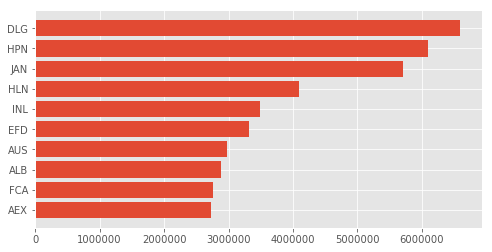

In [19]:
%matplotlib inline
plt.style.use('ggplot')

idxs = np.argsort(counts)[-10:]
counts_large = counts[idxs]

fig = plt.figure(figsize=(8,4))
plt.barh(range(len(counts_large)), counts_large)

xticks_labels = np.array(list(unique_values['Origin']))[idxs]

plt.yticks(range(len(xticks_labels)), xticks_labels)

plt.show()

<center> figure 1. Plot of Busiest Airports.</center>  
Plot in Figure 1 shows DLG, HPN and JAN as the top 3 busiest aiports. All 3 of them show over 5 millions flight departures and the top 2 with over 6 millions.

### Analyzing Age of Plane

We now go ahead and calculate the age of the different planes when they took their flights. We will estimate the first flight of the plane in the dataset as its 'birthmonth'.

In [20]:
%%R 
acindices <- bigsplit(x, 'TailNum', splitcol = NA_real_)

On the next code block, we define the birthmonth function. We use the very first recorded flight for a specific plane as an estimate of its age.

In [21]:
%%R
birthmonth <- function(y) {
    # assume that the input is one matric of values from one plane
    
    # get minimum year for this plane
    minYear <- min(y[,'Year'], na.rm=TRUE)
    # get a subset of the dataset for only this minimum year
    these <- which(y[,'Year']==minYear)
    # get the minimum month from the years
    minMonth <- min(y[these,'Month'], na.rm=TRUE) 
    # return the number of months since 00 AD 
    return(12*minYear + minMonth - 1)
}

In the following, we use sapply that will send the different indices into the given function. We send in the indices of the plane, with the year and month. This will be done for every plane based upon the acindices grouping

In [22]:
%%R
acStart = sapply(acindices, function(i) birthmonth(x[i, c('Year', 'Month'), drop = FALSE]))

We can significantly improve the process by running it in the parallel computation. In the next block we split the operations using a foreach parallel loop using doMC package.

In [25]:
%%R 
library(doMC)
registerDoMC(cores=3)

In [26]:
%%R -o acStart
acStart <- foreach(i=acindices, .combine = c)%dopar% {
    return(birthmonth(x[i, c('Year', 'Month'), drop=FALSE]))
}

We noticed only mild speedup because the computation is fairly quick. We then find the the youngest place by using argmax function of numpy. 

In [27]:
idx = np.argmax(acStart)

print 'The youngest plane is', list(unique_values['TailNum'])[idx],
print 'and flew starting in the year %.0f'%(acStart[idx]/12.0)

The youngest plane is N290WN and flew starting in the year 2009


The result shows flight number N290WN as the newest plane and it started operation in the year 2009. On the next block of code, we fill in the values for 'age' in the big.matrix.

In [28]:
%%R
x[,"age"] <- x[,"Year"]*12+x[,"Month"]-acStart[x[,"TailNum"]] 

Assignment will down cast from double to integer
Hint: To remove this warning type:  options(bigmemory.typecast.warning=FALSE)


This operation was possible because we used the `extraCols` argument when we created the backing file for the big.matrix. If we has not told the API that we planned to add this extra column, then the performance hit for creating a new column is HUGE. That's because we would need to completetly recreate the binary backing file on the hard drive. By telling the API we wnated it upfront, it went ahead and stored NaNs in the column when it created the binary file. That means we just needed to update the file incstead of write a complete new one.

They are easy to perform analysis on them using the technique of splitting, applying, and combining (essentially this is map-reduce in an embarassingly parallel context). Once the preprocessing is done it is also extremely easy (and fast) to load the memory mapped file onto into your R session. 

### Linear Regression of Airline Data
For our Regression analysis, we create a regression model based upon the age of the plane. We want to know if some of the factors such as age are siginificant factors in determining if it will have a delay associated with it. We can achieve this in R by using the 'biganalytics' package. This package uses batch analysis (like we talked about and used in Data Mining) in order to use mini-batch gradient descent upon the linear regression model.
<br>
<br>
In the following step, we will try to predict arrival delay (ArrDelay) using age, distance, weather delat and security airport delay.
<br>
<center> *ArrDelay = B0(intercept) + B1(Age) + B2(Distance) + B3(WeatherDelay) + B4(SecurityDelay)* </center>
<br>
<br>
In the following, biganalytics provides a wrapper to the biglm package.


In [29]:
%%R
blm <- biglm.big.matrix( ArrDelay ~ age + Distance + WeatherDelay + SecurityDelay , data=x )

In [30]:
%%R

summary(blm)

Large data regression model: biglm(formula = formula, data = data, ...)
Sample size =  33540215 
                Coef   (95%    CI)     SE      p
(Intercept)   6.8532 6.8271 6.8793 0.0130 0.0000
age           0.0324 0.0321 0.0326 0.0001 0.0000
Distance      0.0000 0.0000 0.0000 0.0000 0.3424
WeatherDelay  1.1446 1.1433 1.1459 0.0007 0.0000
SecurityDelay 1.0699 1.0594 1.0803 0.0052 0.0000


The summary of the regression analysis shows the coefficients for the intercept and variables in included. It shows that there is a positive association of age and delays, but the association is rather weak. For the distance, the result shows there is no correlation as the p-value exceeds value of 0.05 with 95% confidence level. As for the last 2 features, WeatherDelay and SecurityDelay, we see a positive associatian as expected.   
Given the results, we can now construct the model based on the features given.
<br>
<center> *ArrDelay = 6.85 + 0.0324(Age) + 1.145(WeatherDelay) + 1.070(SecurityDelay)* </center>
<br>

For future endeavor, it is possible to expand our analysis to other numeric variables that we are interested in.

## Analyzing data using Turi Graphlab

Now we will analyze the data using a different package called Graphlab Create (from the company Turi). The graphlab-create API uses something called a scalable data frame (or SFrame) that handles all of the out-of-core memory management. It is by far one of the most optimized tools for handling table data out-of-core. 

In [31]:
import graphlab as gl

Next, we load up aour data into Graphlab SFrame data structure.

In [32]:
sf = gl.SFrame('data/AirlineDataAll.csv')

This non-commercial license of GraphLab Create for academic use is assigned to wsogata@smu.edu and will expire on August 06, 2017.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1492716270.log


Finished parsing file /Users/wsogata/Learn/Git/Quant/Unit14/data/AirlineDataAll.csv

Parsing completed. Parsed 100 lines in 1.51946 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,int,int,int,int,int,int,int,int,int,int,int,str,int,int,int,int,int,str,str,int,int,int,str,str,str,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Read 541148 lines. Lines per second: 165438

Read 2719289 lines. Lines per second: 297239

Read 4903426 lines. Lines per second: 325953

Read 7071440 lines. Lines per second: 339781

Read 9253168 lines. Lines per second: 346982

Read 11421982 lines. Lines per second: 349999

Read 13600297 lines. Lines per second: 354347

Read 15775671 lines. Lines per second: 357978

Read 17942465 lines. Lines per second: 361320

Read 20120148 lines. Lines per second: 363723

Read 22283807 lines. Lines per second: 365348

Read 24461038 lines. Lines per second: 367292

Read 26628985 lines. Lines per second: 367144

Read 28800588 lines. Lines per second: 367743

Read 30973522 lines. Lines per second: 369080

Read 33136496 lines. Lines per second: 370394

Read 35310913 lines. Lines per second: 371780

Read 37471275 lines. Lines per second: 371451

Read 39662352 lines. Lines per second: 372109

Read 41847975 lines. Lines per second: 372375

Read 44034568 lines. Lines per second: 373448

Read 46221577 lines. Lines per second: 372533

Read 48397980 lines. Lines per second: 373354

Read 50582923 lines. Lines per second: 373285

Read 52758423 lines. Lines per second: 372813

Read 54940715 lines. Lines per second: 373300

Read 57124357 lines. Lines per second: 373592

Read 59291994 lines. Lines per second: 373582

Read 61477252 lines. Lines per second: 373804

Read 63651456 lines. Lines per second: 374386

Read 65823033 lines. Lines per second: 374992

Read 67999667 lines. Lines per second: 375076

Read 70161671 lines. Lines per second: 375551

Read 72337163 lines. Lines per second: 375548

Read 74514019 lines. Lines per second: 375865

Read 76674412 lines. Lines per second: 376151

Read 78844498 lines. Lines per second: 376525

Read 80999611 lines. Lines per second: 376716

Read 83167682 lines. Lines per second: 376192

Read 85413151 lines. Lines per second: 375474

Read 87677217 lines. Lines per second: 375055

Read 89957626 lines. Lines per second: 374472

Read 92239255 lines. Lines per second: 374470

Read 94505251 lines. Lines per second: 374244

Read 96783381 lines. Lines per second: 373833

Read 99061091 lines. Lines per second: 373151

Read 100765747 lines. Lines per second: 372119

Read 101891940 lines. Lines per second: 368653

Read 103599464 lines. Lines per second: 367413

Read 105308906 lines. Lines per second: 366960

Read 107016340 lines. Lines per second: 366443

Read 109272595 lines. Lines per second: 366505

Read 111547161 lines. Lines per second: 366189

Read 113254612 lines. Lines per second: 365606

Read 115520198 lines. Lines per second: 365221

Read 117185504 lines. Lines per second: 363812

Read 118822178 lines. Lines per second: 362901

Read 121003415 lines. Lines per second: 362977

Read 123164985 lines. Lines per second: 362848

Finished parsing file /Users/wsogata/Learn/Git/Quant/Unit14/data/AirlineDataAll.csv

Parsing completed. Parsed 123534969 lines in 340.266 secs.

We can run shape command to check the dimension of the frame. 

In [33]:
sf.shape

(123534969, 29)

The results show exactly the same dimension as the previous steps in big matrix format.  
<br>
The next block code to perform all the concatenation we did earlier. We are also supplying graphlab with the data type for each column to ensure that the data is consistent. However, if we do not, Graphlab would try and guess the data type based on the first 100 lines of the csv file.

In [34]:
del sf 
column_hints = [long,long,long,long,long,long,long,long,str,long,str,long,long,str,long,long,str,str,long,str,str,long,str,long,str,str,str,str,str]
t = time.time()
sf = gl.SFrame()

for year in range(1987,2009):
    print 'read %d lines, reading next file %d.csv'%(sf.shape[0], year)
    sys.stdout.flush()
    sftmp = gl.SFrame.read_csv('data/%d.csv'%(year), column_type_hints=column_hints)
    sf = sf.append(sftmp)
    
print 'It took %.2f seconds to concacenate the memory mapped file'%(time.time()-t)
t = time.time()
print 'Saving... '
sf.save('data/sframe_directory')
print 'It took %.2f seconds'%(time.time()-t), 'Shape of Sframe is ', sf.shape

read 0 lines, reading next file 1987.csv


Read 540959 lines. Lines per second: 163251

Finished parsing file /Users/wsogata/Learn/Git/Quant/Unit14/data/1987.csv

Parsing completed. Parsed 1311826 lines in 4.55464 secs.

read 1311826 lines, reading next file 1988.csv


Read 546089 lines. Lines per second: 166835

Read 2730418 lines. Lines per second: 281140

Read 4362442 lines. Lines per second: 297101

Finished parsing file /Users/wsogata/Learn/Git/Quant/Unit14/data/1988.csv

Parsing completed. Parsed 5202096 lines in 16.1195 secs.

read 6513922 lines, reading next file 1989.csv


Read 545019 lines. Lines per second: 162688

Read 2724002 lines. Lines per second: 285166

Read 4890812 lines. Lines per second: 322268

Finished parsing file /Users/wsogata/Learn/Git/Quant/Unit14/data/1989.csv

Parsing completed. Parsed 5041200 lines in 15.393 secs.

read 11555122 lines, reading next file 1990.csv


Read 1089088 lines. Lines per second: 207373

Read 3265792 lines. Lines per second: 275620

Finished parsing file /Users/wsogata/Learn/Git/Quant/Unit14/data/1990.csv

Parsing completed. Parsed 5270893 lines in 17.1603 secs.

read 16826015 lines, reading next file 1991.csv


Read 543797 lines. Lines per second: 151522

Read 2715831 lines. Lines per second: 267150

Read 4878544 lines. Lines per second: 302240

Finished parsing file /Users/wsogata/Learn/Git/Quant/Unit14/data/1991.csv

Parsing completed. Parsed 5076925 lines in 16.4205 secs.

read 21902940 lines, reading next file 1992.csv


Read 1087617 lines. Lines per second: 224291

Read 3263042 lines. Lines per second: 294592

Finished parsing file /Users/wsogata/Learn/Git/Quant/Unit14/data/1992.csv

Parsing completed. Parsed 5092157 lines in 15.2903 secs.

read 26995097 lines, reading next file 1993.csv


Read 543425 lines. Lines per second: 168659

Read 2716517 lines. Lines per second: 289412

Read 4877507 lines. Lines per second: 326548

Finished parsing file /Users/wsogata/Learn/Git/Quant/Unit14/data/1993.csv

Parsing completed. Parsed 5070501 lines in 15.2166 secs.

read 32065598 lines, reading next file 1994.csv


Read 1086678 lines. Lines per second: 219295

Read 3258677 lines. Lines per second: 288917

Finished parsing file /Users/wsogata/Learn/Git/Quant/Unit14/data/1994.csv

Parsing completed. Parsed 5180048 lines in 15.6968 secs.

read 37245646 lines, reading next file 1995.csv


Read 527246 lines. Lines per second: 168203

Read 2635922 lines. Lines per second: 299147

Read 4739268 lines. Lines per second: 327272

Finished parsing file /Users/wsogata/Learn/Git/Quant/Unit14/data/1995.csv

Parsing completed. Parsed 5327435 lines in 15.5818 secs.

read 42573081 lines, reading next file 1996.csv


Read 530202 lines. Lines per second: 172066

Read 2636325 lines. Lines per second: 303892

Read 4733913 lines. Lines per second: 332452

Finished parsing file /Users/wsogata/Learn/Git/Quant/Unit14/data/1996.csv

Parsing completed. Parsed 5351983 lines in 15.5325 secs.

read 47925064 lines, reading next file 1997.csv


Read 529207 lines. Lines per second: 167887

Read 2632920 lines. Lines per second: 292629

Read 4729684 lines. Lines per second: 321624

Finished parsing file /Users/wsogata/Learn/Git/Quant/Unit14/data/1997.csv

Parsing completed. Parsed 5411843 lines in 16.2158 secs.

read 53336907 lines, reading next file 1998.csv


Read 528414 lines. Lines per second: 168798

Read 2629594 lines. Lines per second: 295775

Read 4724179 lines. Lines per second: 323246

Finished parsing file /Users/wsogata/Learn/Git/Quant/Unit14/data/1998.csv

Parsing completed. Parsed 5384721 lines in 16.0382 secs.

read 58721628 lines, reading next file 1999.csv


Read 524911 lines. Lines per second: 165973

Read 2627946 lines. Lines per second: 292627

Read 4723791 lines. Lines per second: 318448

Finished parsing file /Users/wsogata/Learn/Git/Quant/Unit14/data/1999.csv

Parsing completed. Parsed 5527884 lines in 16.5504 secs.

read 64249512 lines, reading next file 2000.csv


Read 524495 lines. Lines per second: 169445

Read 2619994 lines. Lines per second: 296840

Read 4710482 lines. Lines per second: 324854

Finished parsing file /Users/wsogata/Learn/Git/Quant/Unit14/data/2000.csv

Parsing completed. Parsed 5683047 lines in 16.8993 secs.

read 69932559 lines, reading next file 2001.csv


Read 527597 lines. Lines per second: 167980

Read 2638227 lines. Lines per second: 295567

Read 4753139 lines. Lines per second: 317993

Finished parsing file /Users/wsogata/Learn/Git/Quant/Unit14/data/2001.csv

Parsing completed. Parsed 5967780 lines in 17.922 secs.

read 75900339 lines, reading next file 2002.csv


Read 528611 lines. Lines per second: 166381

Read 2619976 lines. Lines per second: 295824

Read 4703277 lines. Lines per second: 321972

Finished parsing file /Users/wsogata/Learn/Git/Quant/Unit14/data/2002.csv

Parsing completed. Parsed 5271359 lines in 15.6873 secs.

read 81171698 lines, reading next file 2003.csv


Read 522593 lines. Lines per second: 163359

Read 2614044 lines. Lines per second: 287888

Read 4290310 lines. Lines per second: 297752

Read 5959346 lines. Lines per second: 301062

Finished parsing file /Users/wsogata/Learn/Git/Quant/Unit14/data/2003.csv

Parsing completed. Parsed 6488540 lines in 21.3303 secs.

read 87660238 lines, reading next file 2004.csv


Read 560245 lines. Lines per second: 147614

Read 2238808 lines. Lines per second: 222970

Read 3917196 lines. Lines per second: 248518

Read 5594351 lines. Lines per second: 257959

Finished parsing file /Users/wsogata/Learn/Git/Quant/Unit14/data/2004.csv

Parsing completed. Parsed 7129270 lines in 26.7819 secs.

read 94789508 lines, reading next file 2005.csv


Read 560141 lines. Lines per second: 164618

Read 2239266 lines. Lines per second: 248270

Read 3917795 lines. Lines per second: 266028

Read 5594330 lines. Lines per second: 274314

Finished parsing file /Users/wsogata/Learn/Git/Quant/Unit14/data/2005.csv

Parsing completed. Parsed 7140596 lines in 25.484 secs.

read 101930104 lines, reading next file 2006.csv


Read 558959 lines. Lines per second: 158283

Read 2235783 lines. Lines per second: 235472

Read 3913588 lines. Lines per second: 257213

Read 5586441 lines. Lines per second: 268992

Finished parsing file /Users/wsogata/Learn/Git/Quant/Unit14/data/2006.csv

Parsing completed. Parsed 7141922 lines in 25.9814 secs.

read 109072026 lines, reading next file 2007.csv


Read 559204 lines. Lines per second: 164319

Read 2233455 lines. Lines per second: 243901

Read 3905970 lines. Lines per second: 263208

Read 5576065 lines. Lines per second: 270590

Read 7230606 lines. Lines per second: 276545

Finished parsing file /Users/wsogata/Learn/Git/Quant/Unit14/data/2007.csv

Parsing completed. Parsed 7453215 lines in 26.692 secs.

read 116525241 lines, reading next file 2008.csv


Read 535634 lines. Lines per second: 167251

Read 2141844 lines. Lines per second: 248799

Read 3746137 lines. Lines per second: 263822

Read 5346855 lines. Lines per second: 270778

Read 6931041 lines. Lines per second: 276333

Finished parsing file /Users/wsogata/Learn/Git/Quant/Unit14/data/2008.csv

Parsing completed. Parsed 7009728 lines in 25.3613 secs.

It took 434.29 seconds to concacenate the memory mapped file
Saving... 
It took 62.32 seconds Shape of Sframe is  (123534969, 29)


We were able to concatenate and load the file in ~430 seconds and saved a compressed binary version in about 1 minute.  

To demonstrate this Graphlab package, for the next step we would like repeat linear regression analysis and to find the answer on which flights with same origin and destination are most likely to be delayed.

### Linear Regression Analysis using Graphlab
We are only going to regress feature Age and Distance agains arrival delay in this demonstration for the sake of saving time.   
<br>
<center> *ArrDelay = B0(intercept) + B1(Age) + B2(Distance)* </center>

In [35]:
sf = gl.load_sframe('data/sframe_directory')

On the following step, we only use years where the tail number was recorded and only use variables needed.

In [36]:
sf_tmp = sf[['TailNum','Year','Month','ArrDelay', 'Distance',]][sf['Year']>1994]

We then make a function for getting the age of the plane.

In [37]:
# First we save the plane's age in years
sf_tmp['FlightAge'] = 12*sf_tmp['Year']+sf_tmp['Month']-1

# # and take the minimum of that in order to get its first flight
t = time.time()
sf_min_ages = sf_tmp[['TailNum','FlightAge']].groupby('TailNum',{'FirstFlight':gl.aggregate.MIN('FlightAge')})
print 'Took %.2f seconds to run'%(time.time()-t)

Took 19.51 seconds to run


Next, we transform the FirstFlight Column into the original dataframe size. We save the flight age and the minimum in a new SFrame.

In [38]:
%time sf_fewcols = sf_tmp[['TailNum','FlightAge']].join(sf_min_ages,on='TailNum',how='left') # long operation

CPU times: user 9min 50s, sys: 20.1 s, total: 10min 11s
Wall time: 2min 50s


We subtract the new calculated quantity and add to the original SFrame. And finally we run regression on age and distance against delay time. 

In [39]:
sf_tmp['Age'] = sf_fewcols['FlightAge']-sf_fewcols['FirstFlight']

In [40]:
%time lin_model = gl.linear_regression.create(sf_tmp['ArrDelay','Age','Distance'].dropna(), target='ArrDelay', features=['Age', 'Distance'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 80001380

Number of features          : 2

Number of unpacked features : 2

Number of coefficients    : 3

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| 1         | 2        | 8.832490     | 2589.482905        | 1466.010289          | 33.362170     | 33.357393       |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

SUCCESS: Optimal solution found.

CPU times: user 4min 31s, sys: 7.08 s, total: 4min 38s
Wall time: 1min 18s


In [41]:
lin_model['coefficients']

name,index,value,stderr
(intercept),None,7.12567872013,0.00723062182091
Age,None,0.0114750105505,9.00304595085e-05
Distance,None,-0.000335106452285,6.63944413468e-06


<center> Table2. Regression Coefficents of Arrival Delay Features.</center>

The result is consistent tht gives us a positive association of Age and arrival delay time. The value is of the same magnitude as what we found using R.   
On Distance coefficient, it is rather different, it maybe because we need to use gradient descent (not batch methods, which are deterministic). The number of iterations and starting point for gradient methods will slightly (or not so slightly sometimes) affect the final coefficient values. Additionally We also highly suspect the pvalue is insignificant, but we cannot tell definitely by using this package. Thus, we decide to leave this feature and the regression model is  
<br>
<center> *ArrDelay = 6.750 + 0.005(Age)* </center>


### Which flights with same origin and destination are most likely to be delayed?

In [42]:
import graphlab.aggregate as agg

First we group the Origin and Dest and calculate the mean delay for each leg and number of FlightNum

In [43]:
%%time
sf_delay1 = sf.groupby(key_columns=['Origin','Dest'], operations={ 'mean_delay': agg.MEAN('DepDelay'),
                                                                   'count_FlightNum': agg.COUNT('FlightNum')})

CPU times: user 1min 46s, sys: 3.76 s, total: 1min 50s
Wall time: 35.1 s


Next we only want to keep the legs that have more than one flight and return the leg with highest mean delay

In [44]:
%%time
sf_delay1[sf_delay1['count_FlightNum']>1].sort('mean_delay', ascending=False)

CPU times: user 63.1 ms, sys: 20.2 ms, total: 83.3 ms
Wall time: 60.4 ms


Dest,Origin,mean_delay,count_FlightNum
FWA,ABE,211.5,2
BIS,RAP,208.333333333,3
ABQ,FMN,203.666666667,3
MFR,RDD,179.0,3
FAT,OAK,176.0,4
PIH,FAT,176.0,2
SGU,LAS,175.333333333,3
ROA,GSO,174.0,2
COD,BIL,173.333333333,3
MSO,HLN,165.666666667,4


We see that ABE->FWA has the highest mean delay of 211.5 We can now group the flights with just ABE->FWA on the original SFrame and calculate the mean delay for each

In [45]:
%%time

sf[(sf['Origin']=='ABE') & (sf['Dest']=='FWA')].groupby(key_columns=['FlightNum'],
                                                        operations={ 'mean_delay': agg.MEAN('DepDelay') })

CPU times: user 1min 40s, sys: 1.53 s, total: 1min 41s
Wall time: 27.2 s


FlightNum,mean_delay
6818,57.0
5932,366.0


The result shows flights 6818 and 5932 are most likely delayed and they have the same Origin of 'ABE' and Destination of 'FWA'.

## Conclusion

Big data sets can challenge and frustrate data analytic users even on high performance hardware.
Certain low-level programming languages such as C++ can be helpful, but is cumbersome for interactive
data analysis and lacks the flexibility and power of the rich statistical programming environment in Python and R.
The R package bigmemory aims to bridge this gap, implementing massive matrices in memory (managed in R but programmed in C++) and supporting their basic manipulation and exploration. Graphlab is another popular platform managed on Python and also programmed in C++ for using scalable machine learning and big data analysis. They are ideal for most problems involving the analysis of manageable subsets of the data, or when an analysis conducted in C++ becomes too complicated.

Given many benefits of these big data packages, they do come with limitations. Certain analysis may not be appropriate for the built-in algorithm on these packages. Some of the versatilities that can be found in packages such as Pandas and Numpy also may not be available and hardware resources such memory might become a constraint.

In conclusion, now that we have seen R's bigmemory and Graphlab's SFrame,  we have a new set of tools to tackle massive data that we are likely to encounter. Performing preprocessing with SFrames is almost always recommended. They are easier to work with. However, the features in split-apply-combine is still falls short of the versatilities of R's bigmemory package. Some operations are optimized, and if we can get away with only using those operations, then try just using SFrames. On the other hand, bigmemory is more flexible and versatile for more deep-dived data mining tasks. The newer version of bigmemory implements the data structures in shared memory. The shared memory version of a BigMatrix object will allow separate R processes on the same computer to share access to a single copy of the massive data set in memory. This opens the door for more powerful and efficient parallel analyses and data mining of massive data sets.

### References

Nolan, D. & Lang, T. L. (2015) Data Science in R. A Case Studies Approach to Computational Reasoning and Problem Solving. Boca Raton, FL: CRC Press.  
Wickham, W. & Grolemund, G. (2015) R for Data Science. Sebastopol, CA: OReilly Media, Inc.   
Case Studies in Data Science with R, Retrieved March 24, 2017, from http://rdatasciencecases.org/   